In [1]:
import numpy as np 
import matplotlib.pyplot as plt # python3 -m pip install matplotlib
!pip install yfinance
import yfinance as yf # python3 -m pip install yfinance
import math
import random
import seaborn as sns # python3 -m pip install seaborn
import datetime
import pandas as pd
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.3 MB/s 
     |████████████████████████████████| 110 kB 9.5 MB/s 
     |████████████████████████████████| 128 kB 56.3 MB/s 
     |████████████████████████████████| 4.1 MB 67.2 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 112 kB 65.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [11]:
# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
  df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
  return df_data

# 
def time_point_dic(time_list, point_list):
  assert len(time_list) == len(point_list)
  dic = {}
  i = 0
  while i<len(time_list):
    dic[time_list[i]] = (1, point_list[i]) # 1 means business day, 0 means holiday
    i += 1
  return dic

# 
def data_union(dic1, dic2):
  # add in complement time values
  time1 = list(dic1.keys())
  time2 = list(dic2.keys())
  time_union = sorted(list(set(time1+time2)))
  for t in time_union:
    if t not in dic1:
      dic1[t] = (0, -1)
    if t not in dic2:
      dic2[t] = (0, -1)
  return time_union

#
def get_previous_data(i, x, y):
  t = x[i]
  flag, point = y[i]
  counter = i
  while flag==0 and counter>=0:
    t = x[counter]
    flag, point = y[counter]
    counter = counter - 1
  if counter!=i:
    from_t = x[i]
    from_f, from_p = y[i]
    #print(from_t, from_f, from_p, "\t", t, flag, point)
    return 0, t, flag, point
  return 1, t, flag, point

def get_next_data(i, j, x, y):
  high_points = []
  counter = i
  while counter<=min(j, len(x)-1):
    f, p = y[counter]
    if f==1:
      high_points.append( p )
    counter += 1
  if len(high_points)==0:
    return 0
  return max(high_points)

In [12]:
st, et = "2022-01-01", "2022-12-31"


tn1 = "BABA" # BABA, BIDU
df_data1 = get_df_data(ticker_name=tn1, start_time=st, end_time=et)
df_data1
dic1_open = time_point_dic(list(df_data1.index), list(df_data1['Open']))
dic1_close = time_point_dic(list(df_data1.index), list(df_data1['Close']))
dic1_low = time_point_dic(list(df_data1.index), list(df_data1['Low']))
dic1_high = time_point_dic(list(df_data1.index), list(df_data1['High']))


tn2 = "9988.HK" # 9988.HK, 9888.HK
df_data2 = get_df_data(ticker_name=tn2, start_time=st, end_time=et)
df_data2
dic2_open = time_point_dic(list(df_data2.index), list(df_data2['Open']))
dic2_close = time_point_dic(list(df_data2.index), list(df_data2['Close']))
dic2_low = time_point_dic(list(df_data2.index), list(df_data2['Low']))
dic2_high = time_point_dic(list(df_data2.index), list(df_data2['High']))

print( "2 stocks:\t")
print( "\t", tn1, "\t\t", len(dic1_open), len(dic1_close), len(dic1_low), len(dic1_high) )
print( "\t", tn2, "\t", len(dic2_open), len(dic2_close), len(dic2_low), len(dic2_high) )

### 
x1 = data_union(dic1_open, dic2_open)
x2 = data_union(dic1_close, dic2_close)
x3 = data_union(dic1_low, dic2_low)
x4 = data_union(dic1_high, dic2_high)

print( "2 stocks:\t")
print( "\t", tn1, "\t\t", len(dic1_open), len(dic1_close), len(dic1_low), len(dic1_high) )
print( "\t", tn2, "\t", len(dic2_open), len(dic2_close), len(dic2_low), len(dic2_high) )


###
x = x1
y1_open, y1_close, y1_low, y1_high = [], [], [], []
y2_open, y2_close, y2_low, y2_high = [], [], [], []

for t in x:
  y1_open.append( dic1_open[t] )
  y1_close.append( dic1_close[t] )
  y1_low.append( dic1_low[t] )
  y1_high.append( dic1_high[t] )
  #
  y2_open.append( dic2_open[t] )
  y2_close.append( dic2_close[t] )
  y2_low.append( dic2_low[t] )
  y2_high.append( dic2_high[t] )

print( "2 stocks:\t", len(x) )
print( "\t", len(y1_open), len(y1_close), len(y1_low), len(y1_high) )
print( "\t", len(y2_open), len(y2_close), len(y2_low), len(y2_high) )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2 stocks:	
	 BABA 		 251 251 251 251
	 9988.HK 	 246 246 246 246
2 stocks:	
	 BABA 		 258 258 258 258
	 9988.HK 	 258 258 258 258
2 stocks:	 258
	 258 258 258 258
	 258 258 258 258


In [51]:
def back_test(signal, profit, days, x, 
          y1_open, y1_close, y1_low, y1_high, 
          y2_open, y2_close, y2_low, y2_high):
  whole_days, focus_days = 0, 0
  profit_list = []
  high_open_dif, open_low_dif = [], []
  #
  i = 0
  while i < len(x) - 1:
    ct, nt = x[i], x[i+1] # current date, next date
      # target info
    target_open_flag, target_open = y2_open[i+1]
    target_close_flag, target_close = y2_close[i+1]
    target_low_flag, target_low = y2_low[i+1]
    target_high_flag, target_high = y2_high[i+1]
    assert target_open_flag==target_close_flag==target_low_flag==target_high_flag
      # reference info
    reference_use, reference_t, reference_flag, reference_point = get_previous_data(i, x, y1_close)
    i += 1
      # target stock is in holiday
    if target_open_flag==0: 
      #print("\t target: ", nt, target_open, target_close, target_low, target_high)
      continue
      # buy signal for target stock
    if reference_point-target_low>signal:
      buy_point = min( target_open, reference_point-signal )
      sell_point = max(target_close, get_next_data(i+2, i+days, x, y2_high)) # days >= 2
      profit = sell_point - buy_point
      # detailed info
      #print( "--------------------------------------------------", reference_use, ct )
      #print( "\t", reference_t, reference_point )
      #print( "\t", nt, target_open, target_close, target_low, target_high )
      #print( "\t", buy_point, sell_point, profit )
      # collect info
      profit_list.append( round(profit, 2) )
      high_open_dif.append( round(target_high-target_open, 2) )
      open_low_dif.append( round(target_open-target_low, 2) )
      focus_days += 1
    whole_days += 1
  return whole_days, focus_days, profit_list, high_open_dif, open_low_dif


# signal to buy
  # profit per share
    # day(s) next

data_info = {}
day_list = list(range(2, 11))
signal, profit, days = 2.0, 2, 6
for signal in range(0, 11):
  signal = 2 + signal*0.1
  print( signal )
  data_info[signal] = {}
  for profit in [1, 1.5, 2, 2.5, 3, 3.5]:
    print( "\t", profit, "\t per share" )
    data_info[signal][profit] = []
    for days in day_list:
      whole_days, focus_days, profit_list, high_open_dif, open_low_dif = back_test(signal, profit, days, x, y1_open, y1_close, y1_low, y1_high, y2_open, y2_close, y2_low, y2_high)
      valid_counter = 0
      for v in profit_list:
        if v>=profit:
          valid_counter += 1
      ratio = round(valid_counter/len(profit_list)*100, 2)
      print( "\t", "\t", days, "days \t", ratio, "% \t", whole_days, focus_days, round(focus_days/whole_days*100, 2) )
      #print( sorted(profit_list) )
      data_info[signal][profit].append( ratio )

2.0
	 1 	 per share
	 	 2 days 	 58.05 % 	 245 205 83.67
	 	 3 days 	 66.34 % 	 245 205 83.67
	 	 4 days 	 68.78 % 	 245 205 83.67
	 	 5 days 	 70.73 % 	 245 205 83.67
	 	 6 days 	 73.17 % 	 245 205 83.67
	 	 7 days 	 75.12 % 	 245 205 83.67
	 	 8 days 	 77.07 % 	 245 205 83.67
	 	 9 days 	 78.05 % 	 245 205 83.67
	 	 10 days 	 79.02 % 	 245 205 83.67
	 1.5 	 per share
	 	 2 days 	 52.2 % 	 245 205 83.67
	 	 3 days 	 60.49 % 	 245 205 83.67
	 	 4 days 	 63.41 % 	 245 205 83.67
	 	 5 days 	 65.37 % 	 245 205 83.67
	 	 6 days 	 67.8 % 	 245 205 83.67
	 	 7 days 	 69.76 % 	 245 205 83.67
	 	 8 days 	 71.71 % 	 245 205 83.67
	 	 9 days 	 72.68 % 	 245 205 83.67
	 	 10 days 	 73.66 % 	 245 205 83.67
	 2 	 per share
	 	 2 days 	 47.32 % 	 245 205 83.67
	 	 3 days 	 55.61 % 	 245 205 83.67
	 	 4 days 	 59.02 % 	 245 205 83.67
	 	 5 days 	 61.46 % 	 245 205 83.67
	 	 6 days 	 65.37 % 	 245 205 83.67
	 	 7 days 	 67.8 % 	 245 205 83.67
	 	 8 days 	 69.76 % 	 245 205 83.67
	 	 9 days 	 71.22 % 	

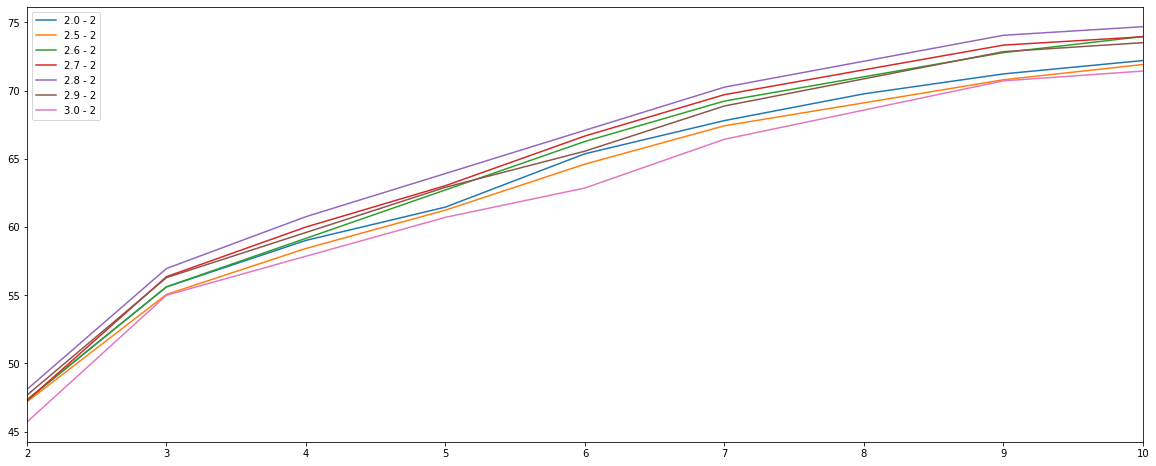

In [45]:
x_values = day_list

plt.figure(figsize=(20, 8))
plt.xlim(min(day_list), max(day_list))

signal = 2
for signal in [0, 5, 6, 7, 8, 9, 10]:
  signal = 2 + signal*0.1
  for profit in [2]: # 1.0, 1.5, 2.0, 2.5, 3.0, 3.5
    y_values = data_info[signal][profit]
    plt.plot( x_values, y_values, label=str(signal) + " - " + str(profit) )

plt.legend()
plt.show()

In [67]:
print( sorted(high_open_dif) )
print( sorted(open_low_dif) )

def bin_analysis(point_list, low_level=0.0, high_level=3.0, level_width=0.1):
  # low_level, high_level, level_width, 
  k_num = round((high_level-low_level)/level_width) + 1
  N = len(point_list)
  fre_dic = {}
  for k in range(k_num):
    fre_dic[round(k*level_width, 1)] = 0

  for v in point_list:
    k = round(v/level_width) * level_width
    if k>high_level:
      k = high_level
    k = round(k, 1)
    fre_dic[k] += 1

  cumulative = 0
  for k in range(k_num):
    k = round(k*level_width, 1)
    cumulative = cumulative + fre_dic[k]
    r = round(cumulative/N*100, 2)
    print( k, "\t", cumulative, "\t", r, "%" )
  return 

bin_analysis(open_low_dif) # high_open_dif, open_low_dif

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.15, 0.15, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.4, 0.4, 0.45, 0.45, 0.45, 0.45, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55, 0.6, 0.6, 0.6, 0.65, 0.65, 0.7, 0.7, 0.7, 0.7, 0.7, 0.75, 0.8, 0.8, 0.8, 0.8, 0.8, 0.85, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.25, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.45, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.7, 1.7, 1.75, 1.8, 1.85, 2.0, 2.0, 2.0, 2.05, 2.1, 2.1, 2.2, 2.2, 2.2, 2.3, 2.4, 2.4, 2.4, 2.5, 2.5, 2.55, 2.6, 2.6, 2.7, 2.7, 2.75, 2.8, 2.85, 2.9, 2.9, 3.05, 3.1, 3.2, 3.55, 3.6, 4.5, 5.1, 5.2, 5.55, 6.1, 15.55, 16.55]
[0.0, 0.0, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 0.8, 0.8, 0.95, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.15, 1.25, 1.25, 1.3, 1.3, 1.3, 1.35, 1.4, 1.4, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.65, 1.65, 1.65, 1.65, 1.7, 1.7, 1.75, 1

111.8